In [68]:
from IPython.display import Image

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [13]:
df = pd.read_csv("data_cat1.csv")

In [14]:
df = df.drop(df.columns[0], axis=1)

In [15]:
df['tier'] = df['tier'].replace(['First','Second','Third'],['1','2','3'])
df['tier'] = df['tier'].astype(float)

In [7]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


## Classification

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [16]:
df_copy = df

In [17]:
df_copy = df_copy.drop('Country',axis=1)

In [18]:
# Creating independent and dependent variables
X = df_copy.drop('tier',axis=1)
y = df_copy['tier']

In [19]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 9), (744,)
Train Data: (187, 9), (187,)


In [20]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=18)

In [21]:
# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

## Evaluation metrics

### Accuracy

In [22]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 1.0


### Confusion Matrix

[[56  0  0]
 [ 0 59  0]
 [ 0  0 72]]


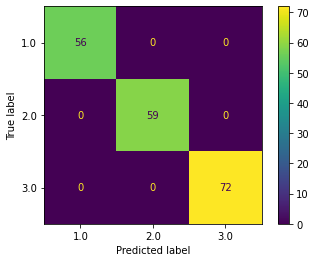

In [23]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

### Precision

In [82]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
#fixed error : https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary 
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions,average='micro')}")

Precision Score of the classifier is: 1.0


### Recall

In [29]:
# Importing all necessary libraries
from sklearn.metrics import recall_score
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='micro')}")

Recall Score of the classifier is: 1.0


### F measure (f1-score)

In [31]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='micro' )}")

F1 Score of the classifier is: 1.0


### Classification report

In [56]:
target_names = ['class 0', 'class 1', 'class 2']
report = classification_report(y_test, predictions, target_names=target_names)

In [57]:
print(report)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        56
     class 1       1.00      1.00      1.00        59
     class 2       1.00      1.00      1.00        72

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187



### Sensitivity and specificity

Couldn't calculate them as this was a 3-class classification

### Kappa statistics

In [40]:
from sklearn.metrics import cohen_kappa_score
print(f"cohen Kappa Score of the classifier is: {cohen_kappa_score(y_test, predictions)}")
#print(f"quad Kappa Score of the classifier is: {kappa(y_test, predictions,weights='quadratic')}")

cohen Kappa Score of the classifier is: 1.0


### Lift chart

In [53]:
pip install scikit-plot

In [55]:
#Cannot calculate Cumulative Gains for data with 3 category/ies
#import scikitplot as skplt
#skplt.metrics.plot_cumulative_gain(y_test, predictions)
#plt.show()

### AUC-ROC Curve

In [34]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

#added pos_label=1 because before i had the error ValueError: multiclass format is not supported
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported 
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=1)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

AUC for our classifier is: 0.20392584514721918


In [87]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_probs = classifier.predict_proba(X_test)

auc = roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")
print('AUC: %.2f' % auc)

AUC: 1.00


In [98]:
#probs = classifier.predict_proba(X_test)
#preds = probs[:, 1]
#auc = roc_auc_score(y_test, preds,multi_class="ovr")
#print('AUC: %.2f' % auc)                                

In [88]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [89]:
#added pos_label=1 because before i had the error ValueError: multiclass format is not supported
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported 
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=1)

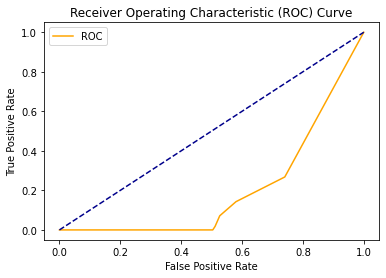

In [90]:
plot_roc_curve(fpr, tpr)

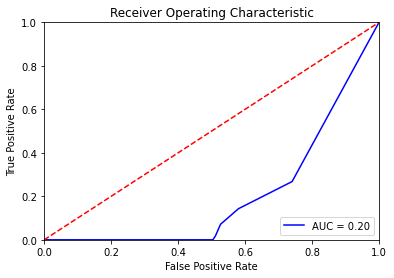

In [35]:
# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

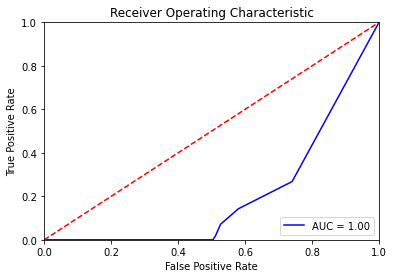

In [86]:
#roc_auc_score
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary 1:

### Confusion matrix

We see on the ploted confusion matrix that all classes are correctly predicted with all cells outside of the diagonal being null.

### Precision

Precision answers the question of “what proportion of predicted positives are truly positive?” Since all cells besides the diagonal are equal to 0, no suprice that it equals 1, the ideal score.

### Recall

Recall answers the question of “what proportion of actual positives are correctly classified?”  since FN = 0 once again we get 1 the ideal score.

### F-measure

It is calculated by taking the harmonic mean of precision and recall, harmonic mean has a nice arithmetic property representing a truly balanced mean so if either precision or recall is low it suffers significantly. Since we have a perfect 1 in precision and recall, it isn't suprising that it equals one as well.

### Classification report

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

- The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). 
- Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.
- In binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
- Support is the number of actual occurrences of the class in the test data set. Imbalanced support in the training data may indicate the need for stratified sampling or rebalancing.

Our report summerizes the perfect scores previously seen.

### Kappa statistics

https://medium.com/apprentice-journal/evaluating-multi-class-classifiers-12b2946e755b

Kappa statisitc computes how successfull is our predictor compared to a random one

This is one of the best metrics for evaluating multi-class classifiers on imbalanced datasets.

The traditional metrics from the classification report are biased towards the majority class and assumes an identical distribution of the actual and predicted classes. In contrast, Cohen’s Kappa Statistic measures the proximity of the predicted classes to the actual classes when compared to a random classification. The output is normalized between 0 and 1 the metrics for each classifier, therefore can be directly compared across the classification task. Generally closer the score is to one, better the classifier.

### AUC-ROC Curve

Sources :
- https://medium.datadriveninvestor.com/evaluation-metrics-101-7c8b4c3421c2 
- https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

The Receiver Operator Characteristic curve (ROC curve) illustrates the true positive rate against the false positive rate of our classifier. AUC provides a singular metric for evaluating a classification model by measuring the area under the ROC curve. 
ROC allows us to determine optimal specificity-recall tradeoff balances specific to the problem we are looking to solve. 

In a nutshell, the major difference between ROC AUC and F1 is related to class imbalance.If you have a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. On the other hand, ROC AUC can give precious high scores with a high enough number of false positives. Besides, you can also think of the ROC AUC score as the average of F1 scores (both good and bad) evaluated at various thresholds. Always use F1 when you have a class imbalance. Higher ROC AUC does not necessarily mean a better classifier. 

When training a classifier, the best performing models will have a ROC curve that hugs the upper left corner of the graph signifying that the model can appropriately distinguish between classes. 
An AUC of 1 means your classifier is perfect, something that is extremely unlikely. While an AUC of 0.5 (50%) or less would indicate your model is no better than random guessing. 

So despite having a perfect score in almost all evaluation metrics, the AUC of 0.2 tells us our model isn't doing a good job  

Finally, since our predicted class isn't that serious. We would in the case of lower scores prioritize recall over precision 

## Comparision between train/test split and cross validation

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

### Train/Test Split

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [58]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 9), (744,)
Train Data: (187, 9), (187,)


The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. (It’s usually around 80/20 or 70/30)

In [60]:
# fit model 
classifier = RandomForestClassifier()
model = classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

The first five predicted values :

In [61]:
predictions[0:5]

array([1., 3., 1., 2., 2.])

Text(0, 0.5, 'Predictions')

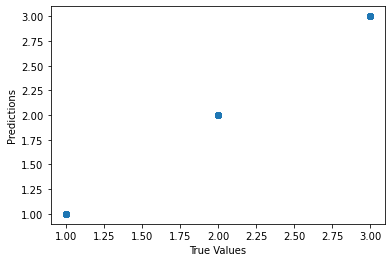

In [63]:
#plot the model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [66]:
print ("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


There is a high chance of overfitting in this model

### Cross Validation

We split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

There are many cross validation methods,one of them is :
- K-Folds Cross Validation

#### K-Folds Cross Validation

we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [69]:
Image(url="1.PNG", width=500, height=400)

In [70]:
from sklearn.model_selection import KFold 

In [71]:
# Instantiating the K-Fold cross validation object with 5 folds
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
# Iterating through each of the folds in K-Fold
for train_index, val_index in k_folds.split(X):
    
    # Splitting the training set from the validation set for this specific fold
    X_train, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Instantiating a RandomForestClassifier model
    model = RandomForestClassifier()
    
    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    model.fit(X_train, y_train)
    
    # Getting inferential predictions for the validation dataset
    val_preds = model.predict(X_val)
    
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    
    # Printing out the validation metrics
    print(f'Accuracy Score: {val_accuracy}')
    print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 1.0
Confusion Matrix: 
[[56  0  0]
 [ 0 66  0]
 [ 0  0 65]]
Accuracy Score: 1.0
Confusion Matrix: 
[[65  0  0]
 [ 0 59  0]
 [ 0  0 62]]
Accuracy Score: 1.0
Confusion Matrix: 
[[61  0  0]
 [ 0 65  0]
 [ 0  0 60]]
Accuracy Score: 1.0
Confusion Matrix: 
[[68  0  0]
 [ 0 56  0]
 [ 0  0 62]]
Accuracy Score: 1.0
Confusion Matrix: 
[[68  0  0]
 [ 0 72  0]
 [ 0  0 46]]


Text(0, 0.5, 'Predictions')

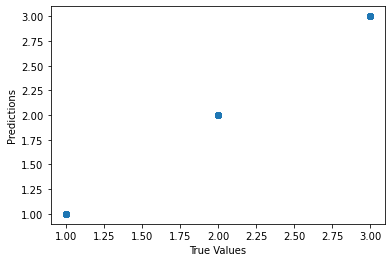

In [74]:
#plot the model
plt.scatter(y_val, val_preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

There might not be overfitting after all, and it is imply an ideal classifier 

## Summary 2 :

https://www.linkedin.com/pulse/traintest-split-versus-cross-fold-validation-william-monroe/ 

When building models we want to ensure that they are 'generalizable'. We don't want our model to only work on the initial collected dataset.

Test/train split is a great thing to do when looking to test the general or extensible nature of a model. The accuracy of a model on the validation dataset gives some insight into the robustness of the built model. However, With small datasets, this can be susceptible to outliers (or the lack thereof) and limit our view of how extensible our model is. 

This is why Cross-fold validation is more robust usually with datasets that are similar in size to ours. It is simply doing train/test split, but several times. This is done by essentially choosing many different splits of the data. This way, every data point could potentially be in either the testing or the training database.